# 7 优化分析子模块 —— [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

#### (1) 基本功能

- 优化分析（Optimization）
- 拟合（Fitting）
- 求根（Root finding）
- 线性规划（Linear Programming）
- 实用（Utilities）

#### (2) 导入基本模块

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sp

#### (3) 导入 optimize 子模块

In [3]:
from scipy import optimize

## 7.1 优化分析

- 在给定集合中寻找一组变量的最优值，以使给定的目标函数取最大或最小值

- 优化函数，初值 $x_0$
    - optimize.fmin(func, x0) —— 求最小值
    - optimize.minimize(func, x0) —— 求最小值
    - optimize.fminbound(func, x1, x2) —— 求区间 $[x1,x2]$ 上的最小值

### 示例 1 —— 多个贝塞尔函数求最大值

- 导入特殊函数子模块
- 调用 ``special.jv(k,x)``
- 参数 $k=[0.5, 1.5, 2.5, 3.5, 4.5]

Text(0.5,1,'Different Bessel functions and their local maxima')

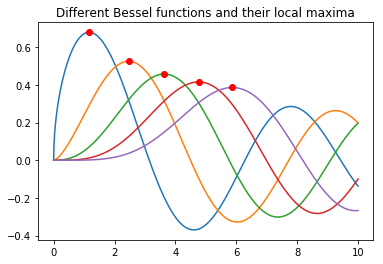

In [75]:
from scipy import special

x = np.linspace(0,10,1001)

for k in np.arange(5) + 0.5:
     y = special.jv(k,x)
     plt.plot(x,y)
    
     f = lambda x: -special.jv(k,x)
     x_max = optimize.fminbound(f,0,6)
     plt.plot([x_max], [special.jv(k,x_max)],'ro')

plt.title('Different Bessel functions and their local maxima')

### 示例 2 —— 光滑函数求最小值


### $$f(x) = x^2 + 8\sin x - 18$$

#### (1) 画曲线并观察

- 在 -1.25 附近取最小值

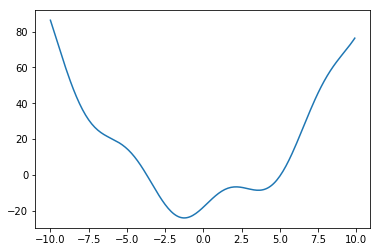

In [63]:
def f(x):
    return x**2 + 8*np.sin(x) - 18


x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

#### (2) 调用``minimize``，初值取 $x_0=0$



In [69]:
result = optimize.minimize(f, x0=0)
result

      fun: -24.029403524291006
 hess_inv: array([[0.10426355]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.25235331])

#### (3) 结果

- 求得最小值处的 $x$ 坐标为 -1.2523533，与观察相符


#### (4) 注意

- 对于光滑曲线函数，采用梯度下降法效果更好
    - nfev —— 函数计算次数
    - nit —— 迭代次数

In [65]:
optimize.minimize(f, x0=0, method="L-BFGS-B")

      fun: array([-24.02940352])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.10542736e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.25235332])

#### (5) 初值的影响

In [70]:
optimize.minimize(f, x0=5, method="L-BFGS-B")

      fun: array([-8.58022436])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
   status: 0
  success: True
        x: array([3.59530491])

## 7.2 曲线拟合

- 由试验数据拟合经验函数
- 函数含未知参数

### 示例 —— 拟合含噪音的正弦曲线数据

#### (1) 生成数据

In [39]:
A, omega, phi = 3.2, 1.8, 1.3

x_data = np.linspace(0, 15, num=50)
y_data = A * np.sin(omega * x_data + phi) + np.random.normal(size=50)

- 已知函数形式为正弦曲线
- 未知参数 $A,\,\,\omega,\,\, \phi$
- 参数真值 $A=3.2,\,\,omega=1.8,\,\,phi=1.3$

#### (2) 定义试验函数（$A,\omega, \phi$ 为参数）

In [31]:
def test_func(x, A, omega, phi):
    return A * np.sin(omega * x + phi)

#### (3) 调用 ``optimize.curve_fit`` 函数

- 返回参数 params（元组）
- 真值的拟合值

In [40]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[3, 1.4, 1.4])
print(params)

[3.04729765 1.82997406 1.05346778]


#### (4) 绘制离散数据点与拟合曲线图

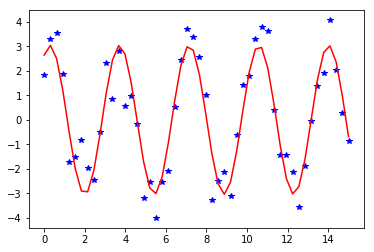

In [41]:
A0, omega0, phi0 = params

plt.plot(x_data, y_data, "*b")
plt.plot(x_data, test_func(x_data, A0, omega0, phi0), "-r")

#### (5) 注意事项

- 初值的选取对于拟合精度很重要

## 7.3 方程求根

- 方程求根函数，初值 $x_0$
    - optimize.fsolve(func, x0)
    - optimize.root(func, x0)

### 示例 —— 解以下方程

$$f(x) = x^2 + 8\sin x - 18 = 0$$

#### (1) 观察有 2 个根

#### (2) 初值取 -5 和 5

#### (3) 求得根为 ``x: array([-3.70502928,  5.05359436])``

#### (4) 对应的函数值为 ``fun: array([6.90292268e-12, 1.03099751e-11])``

In [66]:
root = optimize.root(f, x0=[-5,5])
root

    fjac: array([[-0.99998927, -0.00463252],
       [ 0.00463252, -0.99998927]])
     fun: array([6.90292268e-12, 1.03099751e-11])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.66204553e-08, -2.45909114e-08])
       r: array([ 14.21770369,  -0.03602754, -12.74973597])
  status: 1
 success: True
       x: array([-3.70502928,  5.05359436])

#### (5) 画图

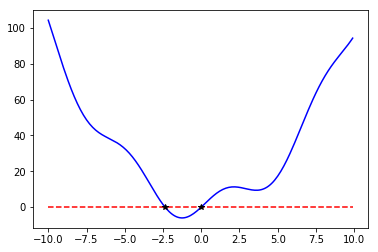

In [59]:
plt.plot(x, f(x), "-b", x, np.zeros(len(x)), "--r")
plt.plot(root.x, root.fun, "*k")

## 结束